# Введение в численные методы и градиенты спуск
Создано с использованием идей и материалов Александра Катруцы и Нейчева Радослава Георгиева 

автор Д.В.Яценко


## А зачем?


* Раздел вышмата - численные методы 
* Задачи нахождения минимакса
* Многие алгоритмы ML - регрессия, линейные модели, как эдемент более сложных моделей. 
* j4f



## I. Задача оптимизации

### Аналитический подход
$$
f(x,y)= x^2 + y^2  + 4x + 4y
$$

$$\frac{df(x)}{dx} = 2x+4$$

$$\frac{df(y)}{dy} = 2y+4$$

$$
f_x'=0, f_y'=0  
$$

\begin{equation*}
 \begin{cases}
   2x+4=0 
   \\
   2y+4=0
\end{cases}
\end{equation*}

$$
M_0 (-2,-2)
$$

$$
A=f_{xx}''=2,B=f_{xy}''=0,C=f_{yy}''=2; \\ AB-C^2=-4 \Rightarrow min
$$




In [41]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

np.random.seed=42

In [42]:
def func(x,y):
  return x**2 +y**2  + 4*x + 4*y

In [43]:
def plot_func(func,from_val,to_val,step): 
  # Creating dataset
  x = np.outer(np.linspace(from_val, to_val, step), np.ones(step))
  y = x.copy().T # transpose
  z = func(x,y)
  
  # Creating figure
  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  
  # Creating plot
  ax.plot_surface(x, y, z)
  
  # show plot
  plt.show()

Построим визуализацию функции $f(x,y)= x^2 + y^2  + 4x + 4y$ и убедимся что аналитически полученная точка (-2,-2) и есть минимум

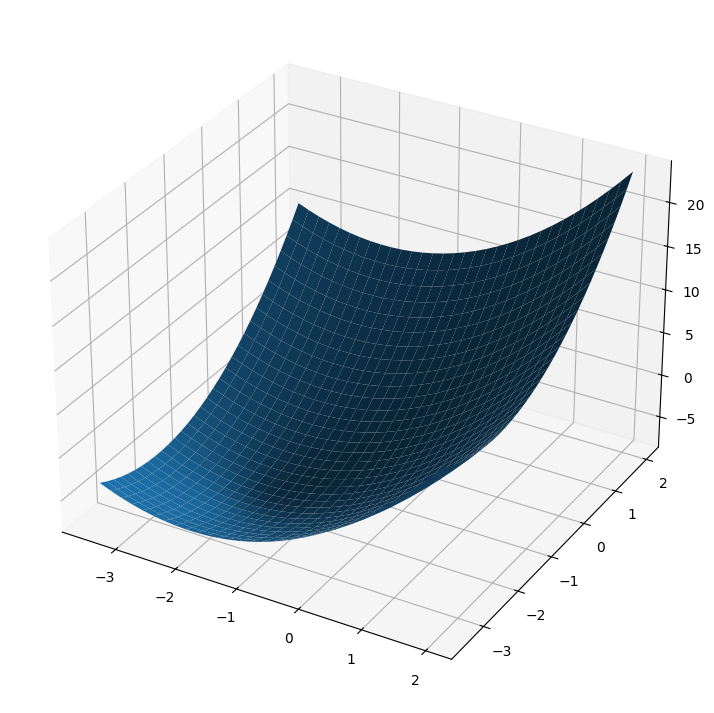

In [44]:
plot_func(func,-3.5,2,32)

## Решение методом градиентного спуска
минимизируем функцию $f(x) = 3x^4-2x^2+0.1x$ итерационным методом градинеттного спуска, и пошагово визуализируем процесс спуска

In [45]:
def func(x):
  return 3*x**4-2*x**2+0.1*x

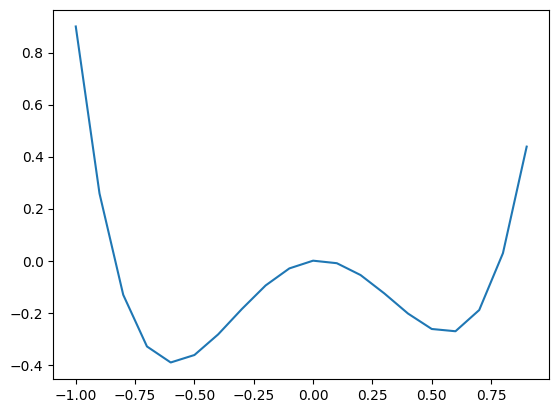

In [46]:
x = np.arange(-1,1,0.1)
plt.plot(x,func(x))
plt.show()

$$
f'(x)=12x^3-4x+0.1
$$
$$
x^{k+1} = x^{k} - α ∇f(x^k) \ ,\ где\ в\ нашем\ случае \\
∇f ≡ f'
$$

In [47]:
lr= 0.1 #0.51 # 0.3 0.2 0.1  ## попробуйте другие learning rate
x = np.arange(-1,1,0.1)
y = func(x)
x_gd=np.array([np.random.random()*2-1])
y_gd=func(x_gd)

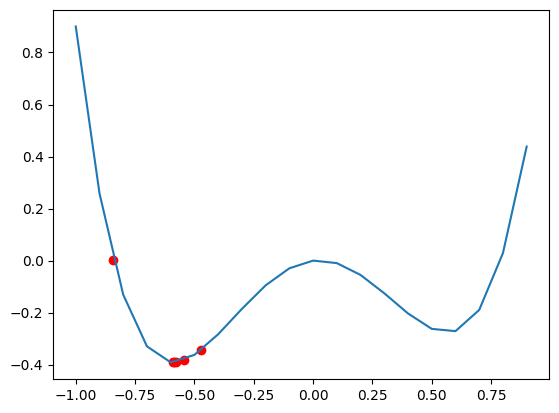

In [58]:
plt.plot(x,func(x))
plt.scatter(x_gd,y_gd,c="r")
plt.show()

In [57]:
_x=x_gd[-1]
f_=12*_x*_x*_x-4*_x+0.1
#f_=derivative(func,_x,dx=1e-6)  ## можно вместо аналитически полученной ф-ии производной воспользоваться библиотечной численной функцией вычисления производной в заданной точке
x_gd=np.append(x_gd,_x-lr*f_)
y_gd=np.append(y_gd,func(x_gd[-1]))
print(x_gd)
print(y_gd)

[-0.84144283 -0.47310385 -0.54527315 -0.57883584 -0.58764279 -0.58918728]
[ 0.00370624 -0.34466897 -0.38397037 -0.39120807 -0.39166628 -0.39168005]


## II. Линейная регрессия
$$
a(x_1,...,x_n) = w_1*x_1+...+w_n*x_n = X \cdot W\\
$$

\begin{equation*}
 \begin{cases}
   x_1^t \cdot w = y_1 \\
   \ \ ... \\
   x_n^t \cdot w = y_n 
\end{cases}
\end{equation*}

$$
\|X \cdot W -Y \|_2^2 → min
$$

### Визуализируем форму регрессии и функции потерь
здесь нет решений, только визуализация формы линейной функции и ф-ии MSE

In [10]:
def lin_func(x,w):
  return x@w.T

In [11]:
len=20
W=np.array([-1,3])
x=[]
for i in range(-10,10):
  for j in range(-10,10):
    x.append([i,j])
X=np.array(x) 
Y=lin_func(X,W)
# print(X.shape)
# print(Y)

In [12]:
print(X[16])
print(W)
print(Y[16])

[-10   6]
[-1  3]
28


In [13]:
def plot_func1(func,x,w,from_val,to_val,step): 

  X=x.T[0].reshape(-1,len)
  Y=x.T[1].reshape(-1,len)
  z = func(x,w)
  Z=z.reshape(-1,len)
  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  ax.plot_surface(X, Y, Z)
  plt.show()

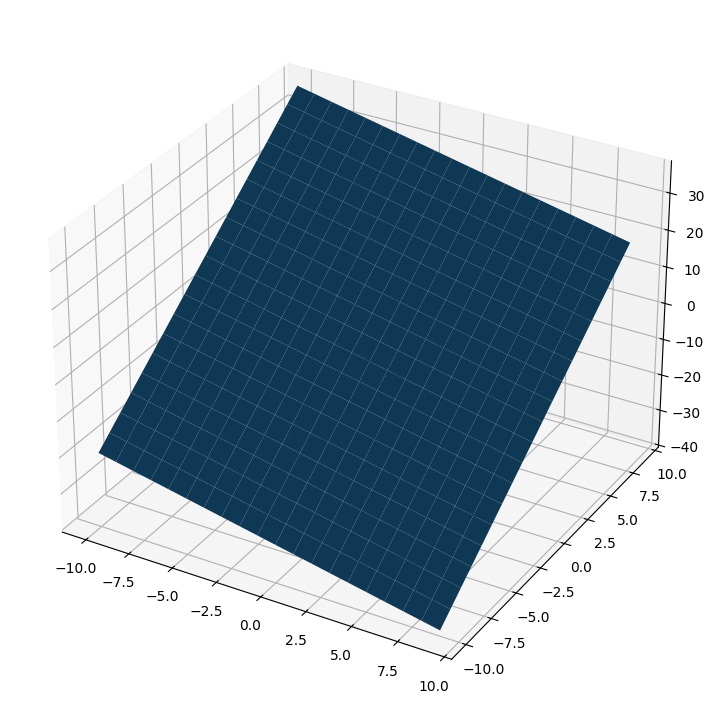

In [14]:
plot_func1(lin_func,X,W,-10,10,32)

Форма функции потерь (loss) MSE

In [15]:
len=20
w=[]
for i in range(-10,10):
  for j in range(-10,10):
    w.append([i,j])
W=np.array(w) 

def loss(x,w):
  y_=lin_func(x,w).diagonal()
  return np.square(y_-Y)
loss(W,X).shape


(400,)

In [16]:
YY=loss(W,X)
print(X[16])
print(W[16])
print(YY[16])

[-10   6]
[-10   6]
11664


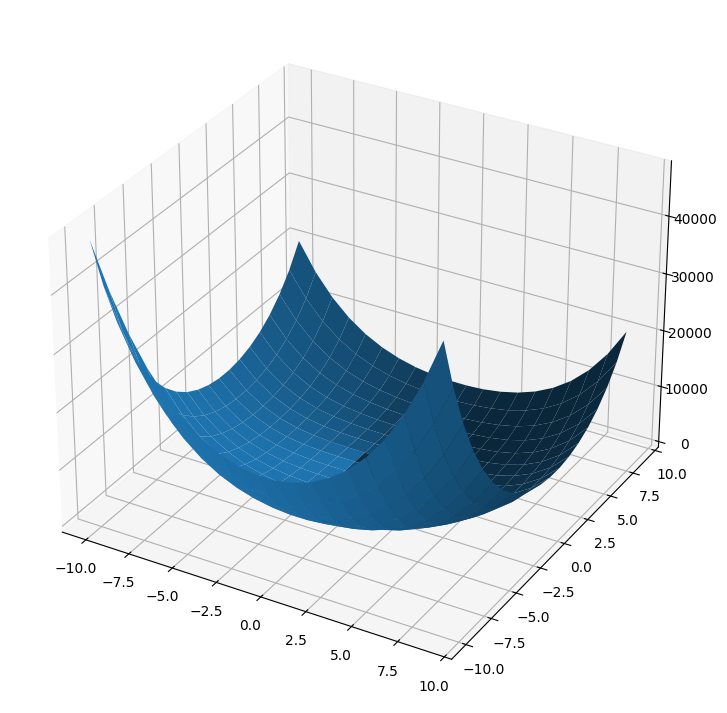

In [17]:
plot_func1(loss,X,W,-30,30,32)

## Решение задачи линейной регресии обратной матрицей

### Разбор теории решения методом обратной матрицы . 

#### Случай квадратной матрицы
$$ 
Y = Xw 
$$
$$
w=X^{-1} Y
$$

In [18]:
w1=3; w2=2
W=np.array([w1,w2])
def lin_func(X,W):
  return X @ W
X=np.array([[1,2],[3,4]])
Y=lin_func(X,W)
print(f' Веса: {W}\n Вход:{X}\n Выход:{Y}\n')

 Веса: [3 2]
 Вход:[[1 2]
 [3 4]]
 Выход:[ 7 17]



In [19]:
det_X= np.linalg.det(X)
print(det_X)
assert(det_X!=0)
X_inv=np.linalg.inv(X)
print(X_inv)
W_=X_inv @ Y
print(f'Вычисленные веса: {W_}\n Вход:{X}\n Выход:{Y}\n')

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
Вычисленные веса: [3. 2.]
 Вход:[[1 2]
 [3 4]]
 Выход:[ 7 17]



#### Случай прямоугольной матрицы

$$
\|Xw-y\|_2^2 = (Xw-y)^t(Xw-y)=  w^tX^tXw-w^tX^ty - y^tXw + y^ty
$$
$$
∇\|Xw-y\|_2^2 = 0 ;  \\
∇\|Xw-y\|_2^2 = 2X^tXw -2X^ty=0;  \\
2X^t(Xw-y)=0
$$

$$
∇\|Xw-y\|_2^2 = 0 ; \\
2X^tXw -2X^ty=0 ; \\
X^tXw=X^ty ;\\
w=(X^tX)^{-1}X^ty
$$
Где $(X^tX)^{-1}X^t$ псевдообратная матрица Мура-Пенроуза,

In [20]:
W=np.array([3,2])
def lin_func(X,W):
  return X @ W
X=np.array([[1,20],[3,-4],[3,4],[1,1]])
Y=lin_func(X,W)
print(f' Веса: {W}\n Вход:{X}\n Выход:{Y}\n')

 Веса: [3 2]
 Вход:[[ 1 20]
 [ 3 -4]
 [ 3  4]
 [ 1  1]]
 Выход:[43  1 17  5]



In [21]:
XX=X.T @ X
det_XX= np.linalg.det(XX)
print(det_XX)
assert(det_XX!=0)
XX_inv=np.linalg.inv(XX)
print(XX_inv)
W_=XX_inv @ X.T
W_=W_ @ Y
print(f'Вычисленные веса: {W_}\n Вход:{X}\n Выход:{Y}\n')

8218.999999999993
[[ 0.05268281 -0.00255506]
 [-0.00255506  0.00243339]]
Вычисленные веса: [3. 2.]
 Вход:[[ 1 20]
 [ 3 -4]
 [ 3  4]
 [ 1  1]]
 Выход:[43  1 17  5]



### Решение задачи линейной регрессии методом SGD
пусть прямая задана функцией
$$
y=x_1*w_1+x_2*w_2 \\
y=xw
$$
**Важно!** искомая переменная - вектор w 

Готовим синтетические исходные данные по линеному закону с добавлением шума

In [22]:
n_features = 2
n_objects = 300
batch_size = 10
epochs = 40
w_orig = np.random.normal(size=(n_features, ))
X = np.random.uniform(-5, 5, (n_objects, n_features))
Y = X @ w_orig + np.random.normal(0,1, n_objects)

In [23]:
print(w_orig)
print("X {} : {} ".format(X.shape,X[0]))
print("Y {} : {} ".format(Y.shape,Y[0]))

[-2.51041853 -1.31292976]
X (300, 2) : [ 2.21825286 -1.57959162] 
Y (300,) : -3.959987426740742 


выполняем **полный** GD(градиентный спуск)

In [24]:
lr_0=lr = 0.02
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w_list = np.array([w_0])
for i in range(epochs):
  # lr = lr_0 / ((i+1) ** 0.51)  ## изменяемый шаг обучения
  w = w_list[-1] - lr * 2 * np.dot(X.T, (X.dot(w_list[-1]) - Y))  / n_objects 
  w_list=np.append(w_list,[w],axis=0)

Результат, обратите внимание насколько найденные веса соотвествуют веса исходной линейной ф-ии, по которой строился исходный датасет

In [25]:
print("Найденные w:{} \n Исходные w: {}".format(w_list[-1],w_orig ))
w_list.shape


Найденные w:[-2.50898558 -1.31375606] 
 Исходные w: [-2.51041853 -1.31292976]


(41, 2)

Рисуем траекторию спуска по эквипотенциальной поверхности. На графике представлены разноцветные линии уровня - вдоль них значение функции потерь одинаково. В рассматриваем примере - фактически это "вид сверху" на параболоид.

In [26]:
def plot_trajectory(w_list):
  A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
  levels = np.empty_like(A)
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      w_tmp = np.array([A[i, j], B[i, j]])
      levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
  plt.figure(figsize=(13, 9))
  plt.title("GD trajectory")
  plt.xlabel("$w_1$")
  plt.ylabel("$w_2$")
  plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
  plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
  plt.gca().set_aspect("equal")
  # visualize the level set
  CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15),
  cmap=plt.cm.rainbow_r)
  CB = plt.colorbar(CS, shrink=0.8, extend="both")
  # visualize trajectory
  plt.scatter(w_orig[0], w_orig[1], c='r')
  plt.scatter(w_list[:, 0], w_list[:, 1])
  plt.plot(w_list[:, 0], w_list[:, 1])
  plt.show()

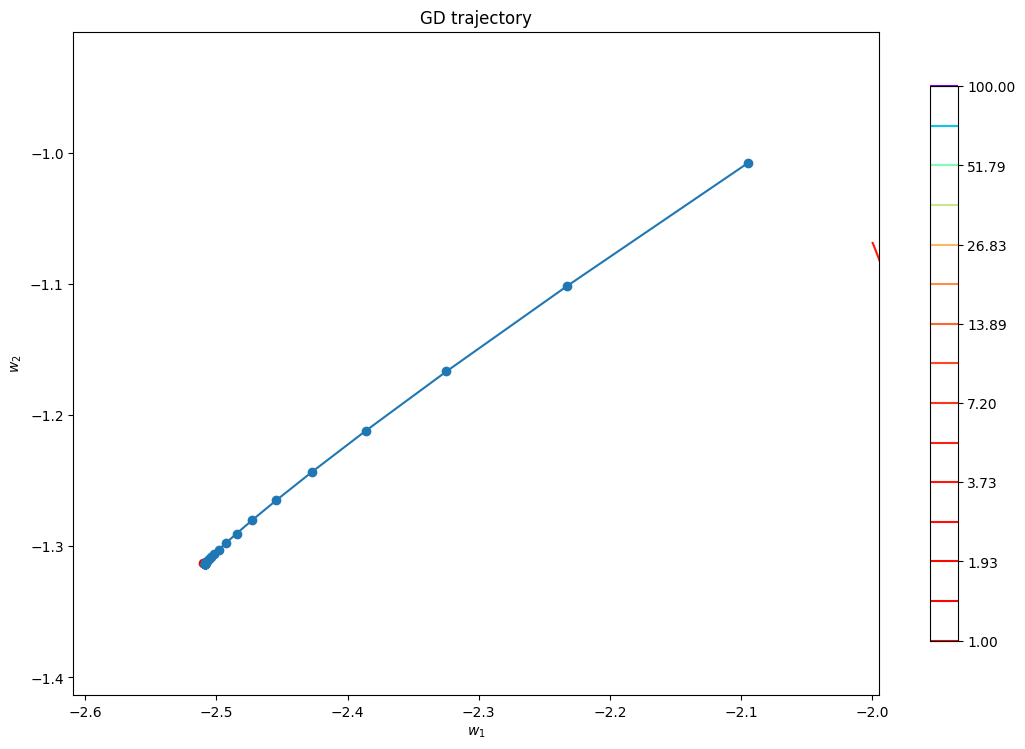

In [27]:
plot_trajectory(w_list)

Рисуем регрессию

In [28]:
def plot_regr(X,Y,w_list):
  w1=w_list[-1][0]
  w2=w_list[-1][1]
  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  ax.scatter(X[:,0],X[:,1],Y) 

  x_regr=[-5 , 5]
  y_regr=[-5 , 5]
  z_regr=[w1*-5 + w2*-5, 
          w1*5 + w2*5 ]
  ax.plot3D(x_regr, y_regr, z_regr,c="r")        
  plt.show()

На изображении видим точки исх датасета и линию построенной линейной регресси

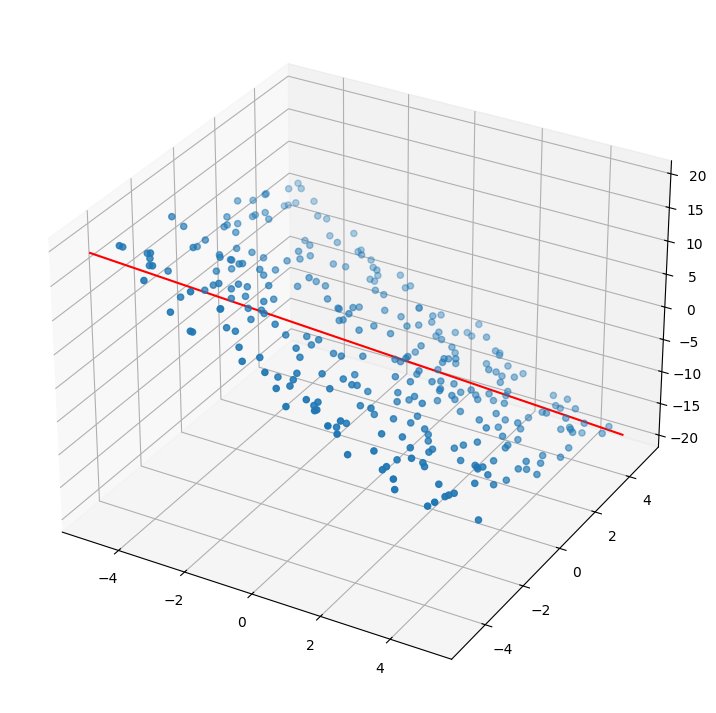

In [29]:
plot_regr(X,Y,w_list)

Решаем SGD **по одному** образцу из датасета за шаг

In [30]:
lr = 0.03
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w_list = np.array([w_0])
for e in range(10):
  for i in range(n_objects):
    X_=X[i]
    Y_=Y[i]
    w = w_list[-1] - lr * 2 * np.dot(X_.T, (X_.dot(w_list[-1]) - Y_))  / n_objects 
    w_list=np.append(w_list,[w],axis=0)

Результат

In [31]:
print("Найденные w:{} \n Исходные w: {}".format(w_list[-1],w_orig ))
w_list.shape

Найденные w:[-2.51107714 -1.29944239] 
 Исходные w: [-2.51041853 -1.31292976]


(3001, 2)

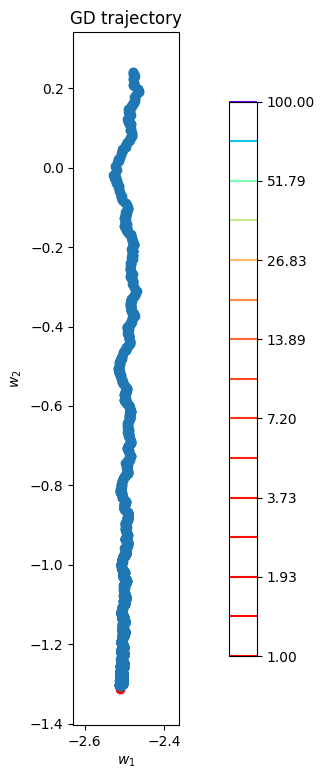

In [32]:
plot_trajectory(w_list)

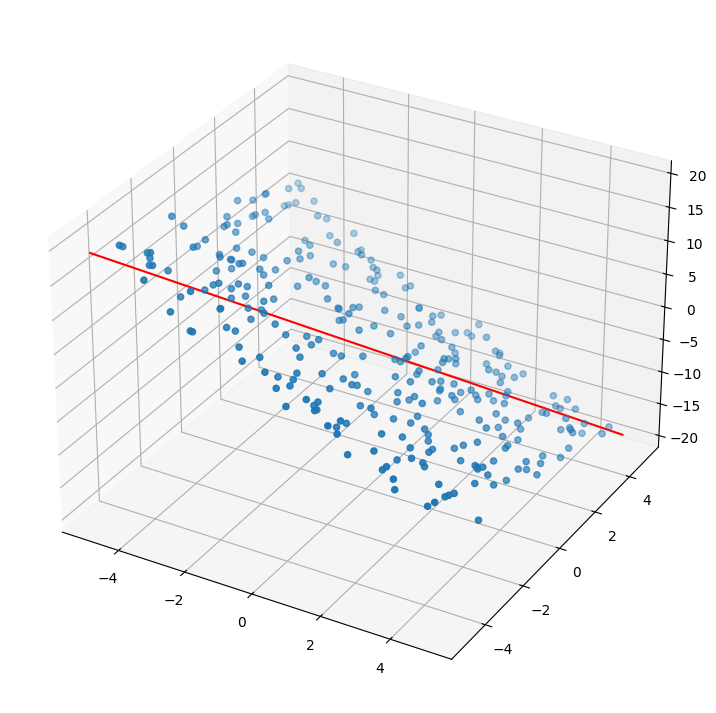

In [33]:
plot_regr(X,Y,w_list)

решаем SGD используя **батчевый спуск**

In [34]:
lr = 0.02
batch=10  ## Попробуйте 5
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w_list = np.array([w_0])
for e in range(10):
  for i in range(0,n_objects,batch):
    X_ = X[i:i+batch, :]
    Y_ = Y[i:i+batch]
    w = w_list[-1] - lr * 2 * np.dot(X_.T, (X_.dot(w_list[-1]) - Y_))  / n_objects 
    w_list=np.append(w_list,[w],axis=0)

In [35]:
print("Найденные w:{} \n Исходные w: {}".format(w_list[-1],w_orig ))
w_list.shape

Найденные w:[-2.43812142 -1.34533008] 
 Исходные w: [-2.51041853 -1.31292976]


(301, 2)

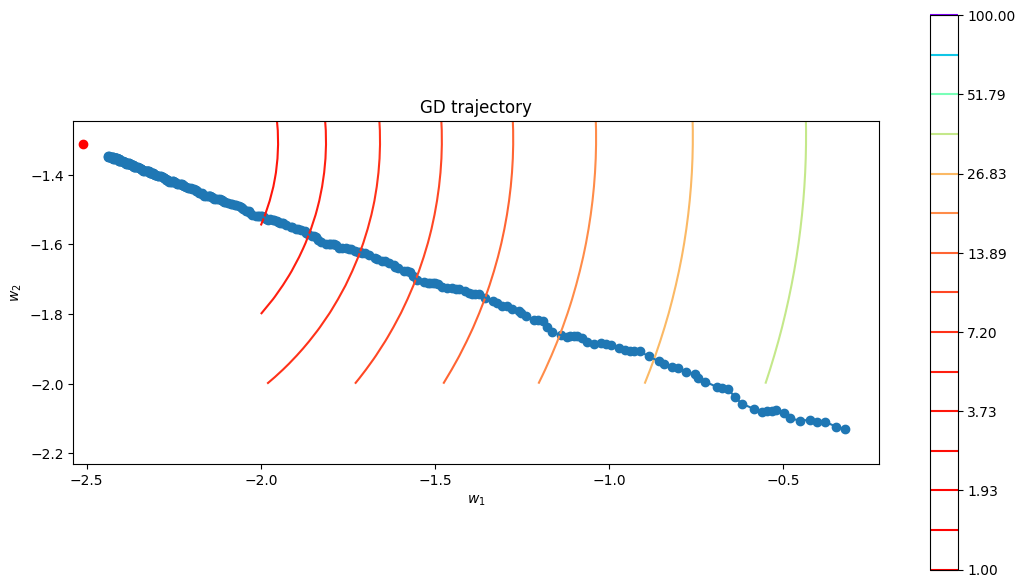

In [36]:
plot_trajectory(w_list)

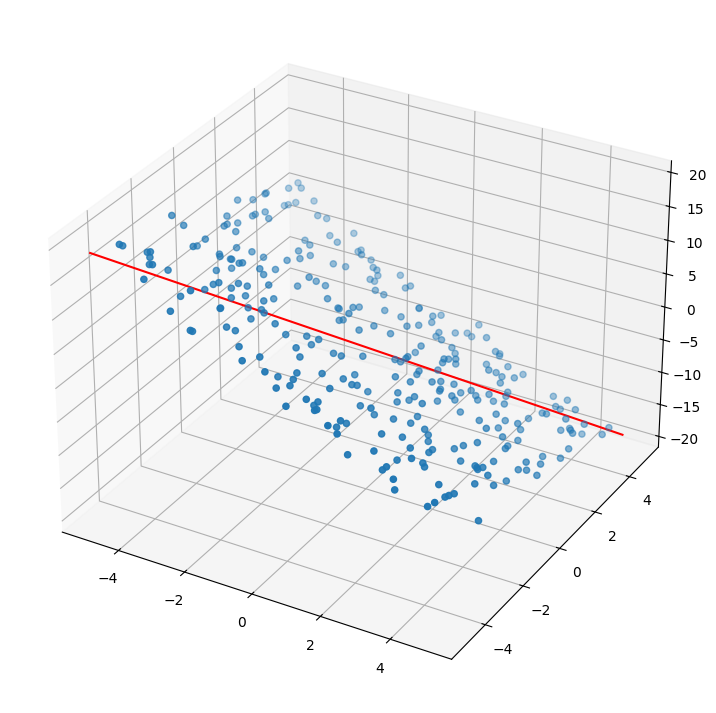

In [37]:
plot_regr(X,Y,w_list)

**Вывод**  - оцените количество операций на обучении во всех подходах

## Регрессионный анализ

Теперь поработаем с датасетом с реальными данными по [продажам машин]([https://www.kaggle.com/datasets/otrivedi/automobile-data)

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [39]:
X_all = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [259]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [260]:
y = X_all[25]
X_raw = X_all.drop(25, axis=1)

отберем только три колонки

In [261]:
X_raw=X_all.iloc[:,[10,21,25]] # длинна, лошадинные силы (мощность), цена
X_raw.head()

,10,21,25
0,168.8,111.0,13495.0
1,168.8,111.0,16500.0
2,171.2,154.0,16500.0
3,176.6,102.0,13950.0
4,176.6,115.0,17450.0


In [262]:
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns]
from sklearn.impute import SimpleImputer
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_raw), columns=X_raw.columns)

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

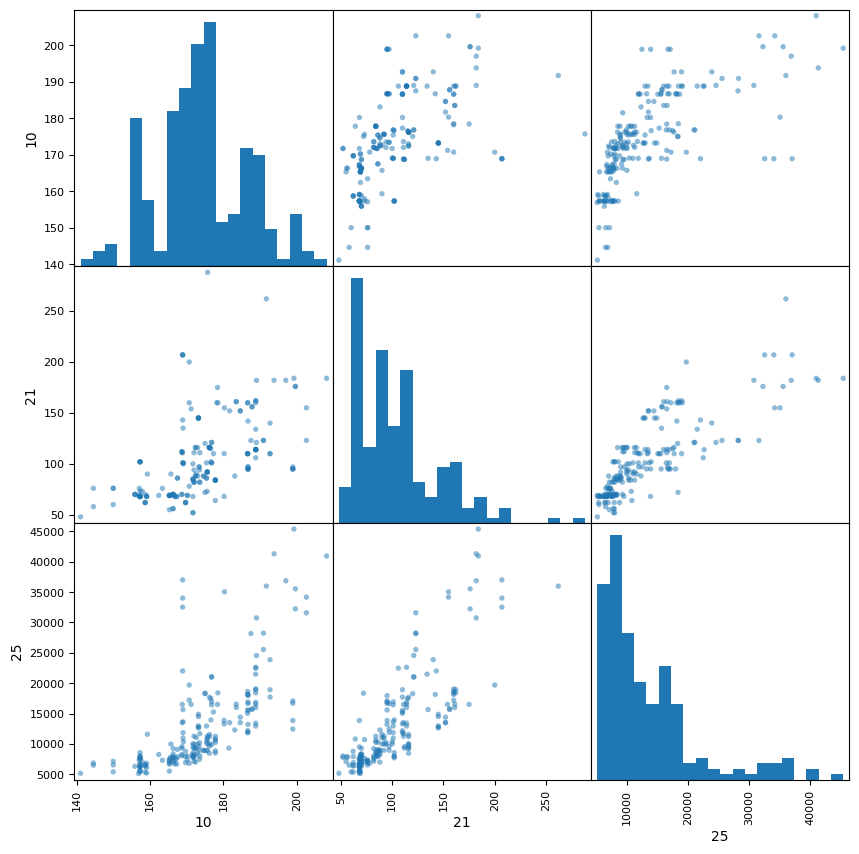

In [263]:
pd.plotting.scatter_matrix(X_raw, figsize=(10, 10),  hist_kwds={'bins': 20}, s=60, alpha=.5)
plt.show()

In [264]:
# отделим признак цены как целевое значение
y_ = X_no_mis_real[25].copy()
X_ = X_no_mis_real.drop(25, axis=1).copy()
# X_.iloc[0],y_[0]

In [265]:
# разрежем датасет на обучающий и тестовый
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

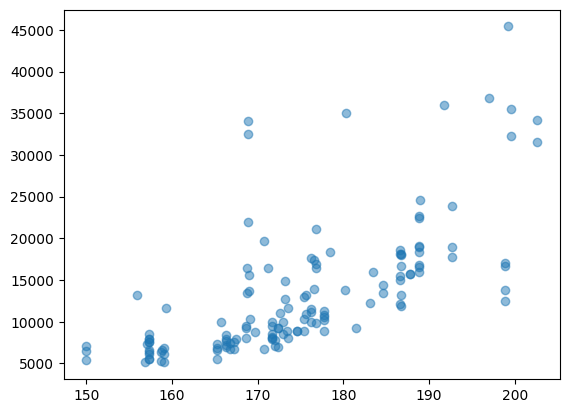

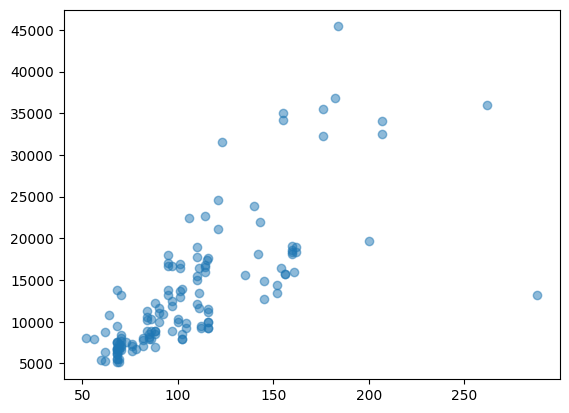

In [266]:
# графическое представление обучающего датасета
plt.scatter(X_train[10], y_train, alpha=.5)
plt.show()
plt.scatter(X_train[21], y_train, alpha=.5)
plt.show()

### Пример обучения регрессии
Используем библиотечную реализацию линеной регрессии из Scikit learn

In [429]:
def plot_regr(X,Y,y,w,b):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.scatter(X[:,0],X[:,1],Y) 
    i=X[:,0].argmin()
    j=X[:,0].argmax()
    x_regr=[X[i,0] , X[j,0]]
    y_regr=[X[i,1] , X[j,1]]
    z_regr = [X[i,0] *w[0]+X[i,1]*w[1]+b,
              X[j,0]*w[0]+X[j,1]*w[1]+b]
    print((y[i],y[j]))
    ax.scatter(x_regr,y_regr,z_regr,c="w") 
    ax.plot(x_regr,y_regr,[y[i],y[j]],c="r") 
    ax.plot(x_regr,y_regr,[Y[i],Y[j]],c="g") 
    plt.show()

Обучим линейную модель LinearRegression, с функцией потерь MSE

In [430]:
from sklearn.linear_model import LinearRegression as LR
X_=X_train.copy()
Y_=y_train.copy()
lr = LR()
lr.fit(X_, Y_)  # найдем веса линейной модели

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

LinearRegression()

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


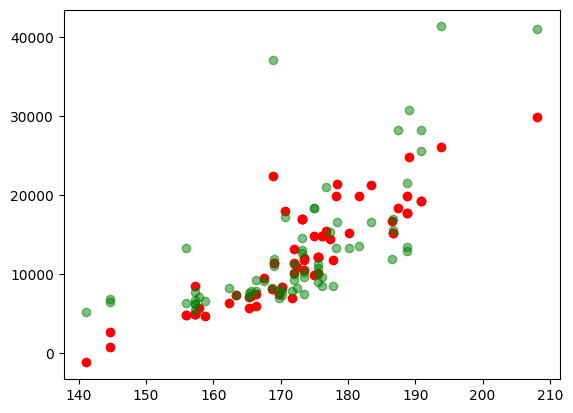

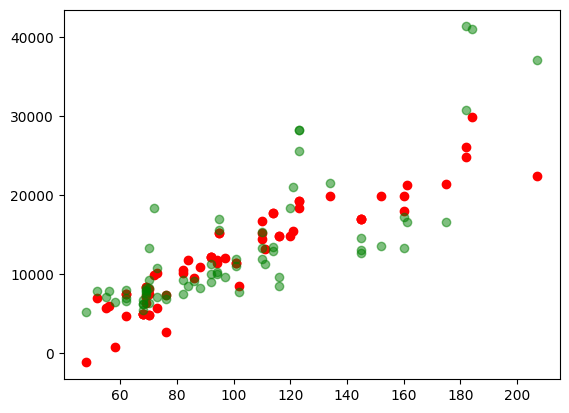

In [431]:
# сравним предсказание на тестовом датасетом с истинным значением
y_=lr.predict(X_test) # предскажем
#длинна машины
plt.scatter(X_test[10],y_,c='r')
# plt.scatter(X_[10], Y_, alpha=.5)
plt.scatter(X_test[10], y_test, alpha=.5,color='g')
plt.show()
#лошадинные силы
plt.scatter(X_test[21],y_,c='r')
# plt.scatter(X_[21], Y_, alpha=.5)
plt.scatter(X_test[21], y_test, alpha=.5,color='g')
plt.show()

In [432]:
lr.coef_,lr.intercept_

(array([253.22810152, 103.99194068]), -41961.94470821667)

(-1239.8464309011615, 29869.34030363527)


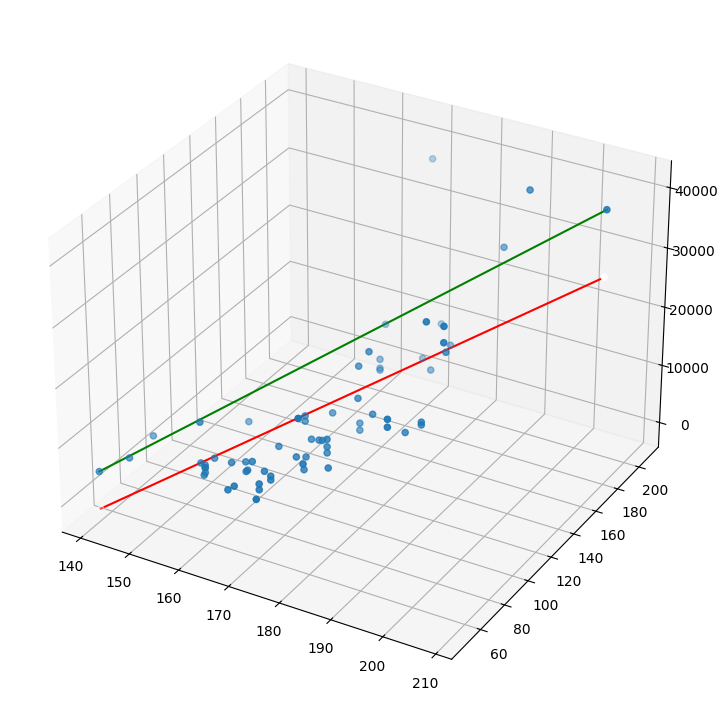

In [433]:
plot_regr(X_test.values,y_test.values,y_,lr.coef_,lr.intercept_)

### Решим  методом обратной матрицы

In [446]:
X_=X_train.copy().values
O=np.ones((X_.shape[0],X_.shape[1]+1))
O[:,:-1]=X_
X_=O
Y_=y_train.copy().values
W_=np.linalg.inv(X_.T @ X_).dot(X_.T).dot(Y_)
# Y_[:10],(X_ @ W_.T)[:10]

In [449]:
W_

array([   253.22810152,    103.99194068, -41961.94470821])

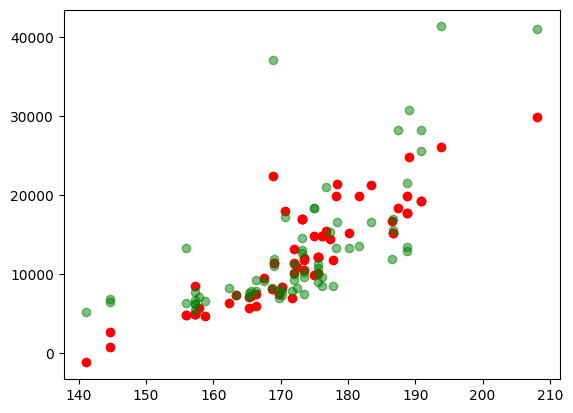

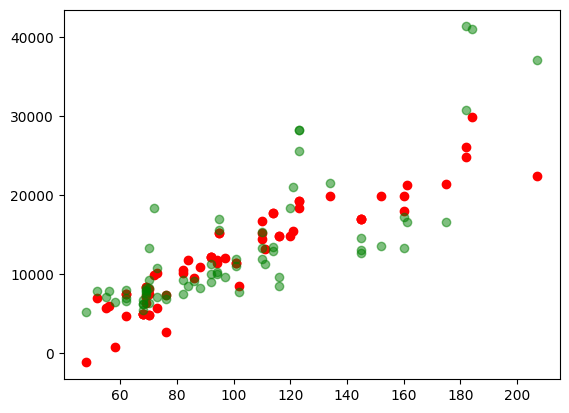

In [451]:
# сравним предсказание на тестовом датасетом с истинным значением
y_=X_test @ W_[:2].T + W_[-1] # предскажем
#длинна
plt.scatter(X_test[10],y_,c='r')
plt.scatter(X_test[10], y_test, alpha=.5,color='g')
plt.show()
#лошадинные силы
plt.scatter(X_test[21],y_,c='r')
plt.scatter(X_test[21], y_test, alpha=.5,color='g')
plt.show()

(-1239.8464308995535, 29869.340303635247)


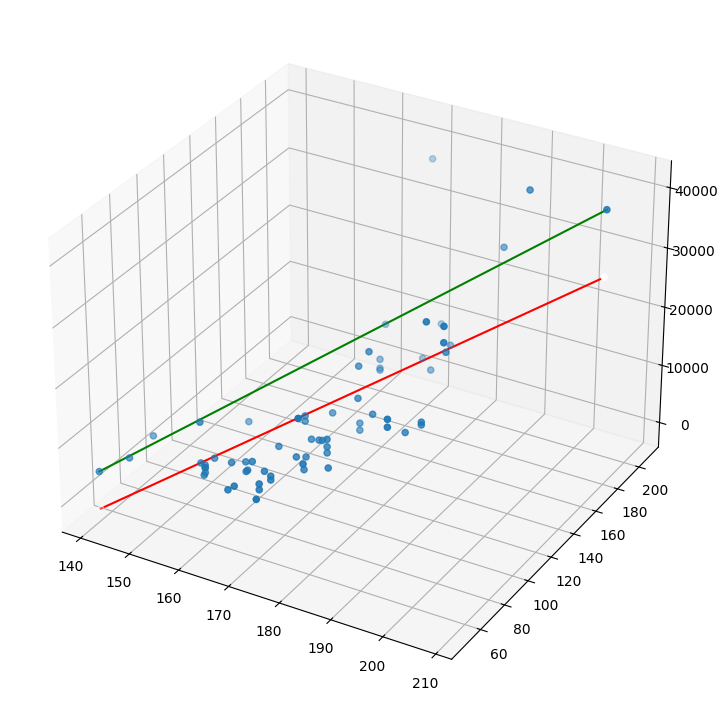

In [453]:
plot_regr(X_test.values,y_test.values,y_.values,W_[:2],W_[-1])

### Решим собственной реализации линейной регрессии методом SGD

In [598]:
x=np.array([[1,2],[1,1],[1,3]])
w=np.array([2,2])
y=np.array([1,2,0])
b=1
print(predict(x,w,b))
l=predict(x,w,b)-y
print(l)
print(mse_derivatives(x, w, b, y))



[7 5 9]
[6 3 9]
(array([12., 28.]), 12.0)


In [623]:
def predict(x, w, b):
  return x@w + b

def mse_loss(x, w, b, y):
  return np.mean((predict(x, w, b) - y)**2)

def mse_derivatives(x, w, b, y):
  l=predict(x,w,b)-y
  return 2*l.T@x/x.shape[0] , np.average(2*l)

In [624]:
X_=X_train.copy().values
Y_=y_train.copy().values

In [697]:
epochs=60
lr_0=lr = 0.00005
w_0=np.array( [(Y_[30]-Y_[10])/(X_[30][0]-X_[10][0]),  (Y_[30]-Y_[10])/(X_[30][1]-X_[10][1])])
b_0=(Y_[30]-w_0[0]*X_[30][0] + Y_[30]-w_0[1]*X_[30][1])/2
# w_0 = np.random.uniform(-1, 1,n_features)-0.5
w_list = np.array([w_0])
b_list=np.array([b_0])
for i in range(epochs):
    lr = lr_0 / ((i%10+1) ** 0.51)  ## изменяемый шаг обучения
    w=w_list[-1].copy()
    b=b_list[-1].copy()
    if i%5==0: print(mse_loss(X_,w,b,Y_))
    dw, db = mse_derivatives(X_, w, b, Y_)
    w = w - lr * dw
    b = b - lr * db
    w_list=np.append(w_list,[w],axis=0)
    b_list=np.append(b_list,[b],axis=0)

4528481470.536143
365667692978.4342
235050458.20942855
17475554461.85464
29735368.824159108
852700314.3050517
19807176.19583851
59060556.851711
19287106.488053128
21148330.71230357
19245474.295765076
19329688.532967594


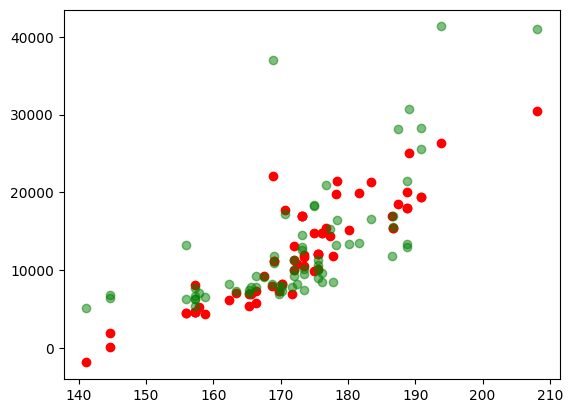

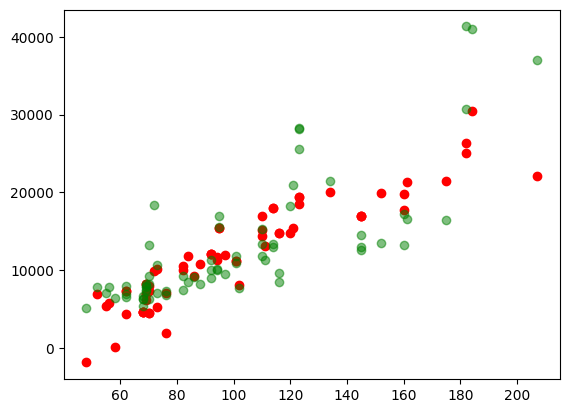

In [698]:
# сравним предсказание на тестовом датасетом с истинным значением
y_=predict(X_test,w_list[-1],b_list[-1]) # предскажем
#длинна машины
plt.scatter(X_test[10],y_,c='r')
plt.scatter(X_test[10], y_test, alpha=.5,color='g')
plt.show()
#лошадинные силы
plt.scatter(X_test[21],y_,c='r')
plt.scatter(X_test[21], y_test, alpha=.5,color='g')
plt.show()

In [699]:
w_list[-1],b_list[-1]

(array([272.34077294, 103.4791405 ]), -45265.019648209425)

(-1870.7378418547596, 30449.257053638437)


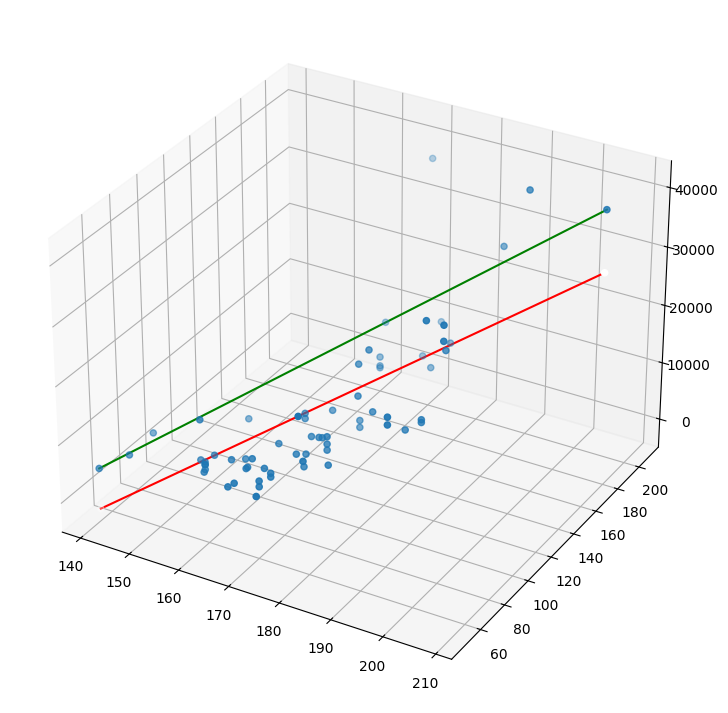

In [700]:
plot_regr(X_test.values,y_test.values,y_.values,w_list[-1],b_list[-1])

# The END!